In [2]:
# Dependencies -> pip install rasterio, pip install richdem

# Find the image here: https://drive.google.com/file/d/1NH5Tgaw5p6p29tbizSh69JRoQr9cDfpv/view?usp=sharing

import os 
cwd = os.getcwd()
print(cwd)

/Users/admin/Downloads


In [3]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt


In [4]:
dem = rio.open("DEM.tiff")
dem_array = dem.read(1).astype('float64')

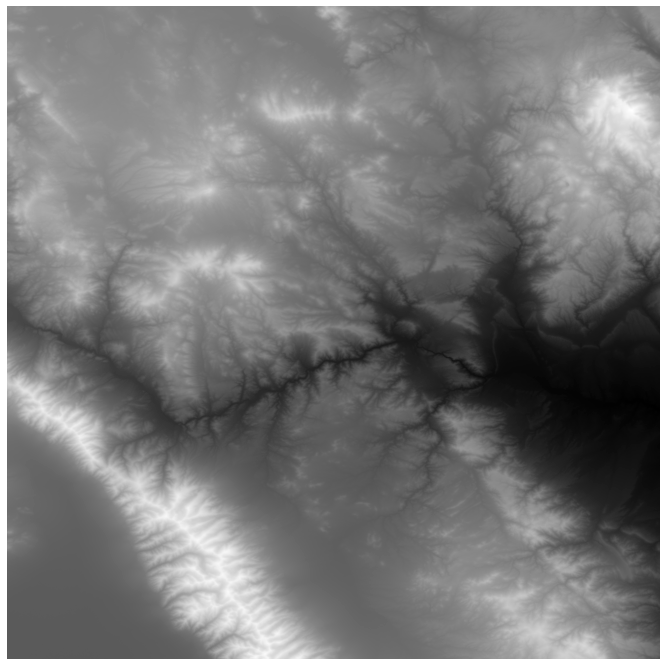

In [5]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
plt.axis("off")
plt.show()

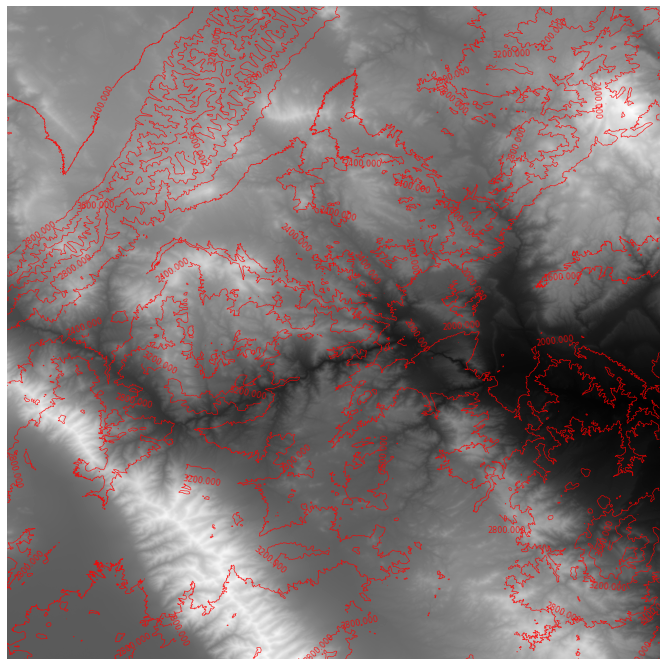

In [6]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
show(dem_array, contour=True, ax=ax, linewidths=0.7)
plt.axis("off")
plt.show()

In [7]:
import richdem as rd
dem_richdem = rd.rdarray(dem_array, no_data=-9999)


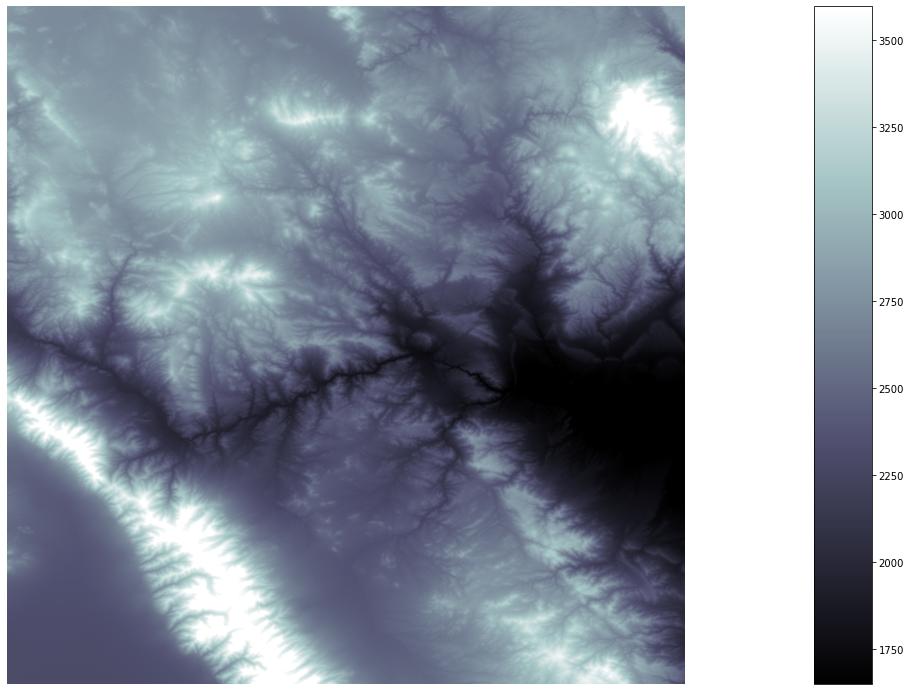

{'vmin': 1649.0, 'vmax': 3597.0}

In [8]:
fig = rd.rdShow(dem_richdem, axes=False, cmap='bone', figsize=(16, 10));
fig

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


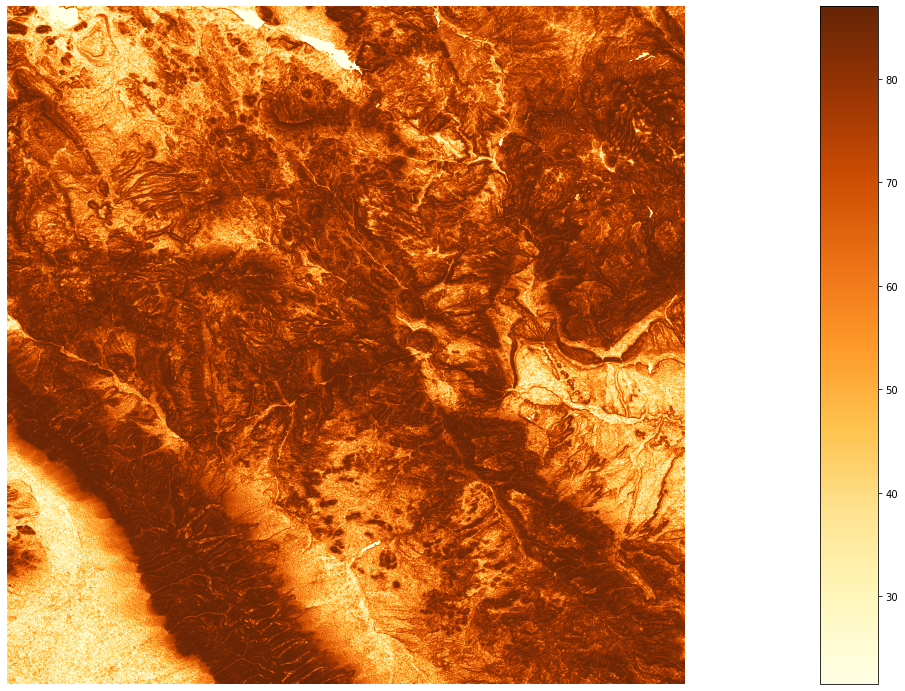

In [9]:
dem_slope = rd.TerrainAttribute(dem_richdem, attrib='slope_degrees')
rd.rdShow(dem_slope, axes=False, cmap='YlOrBr', figsize=(16, 10));

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


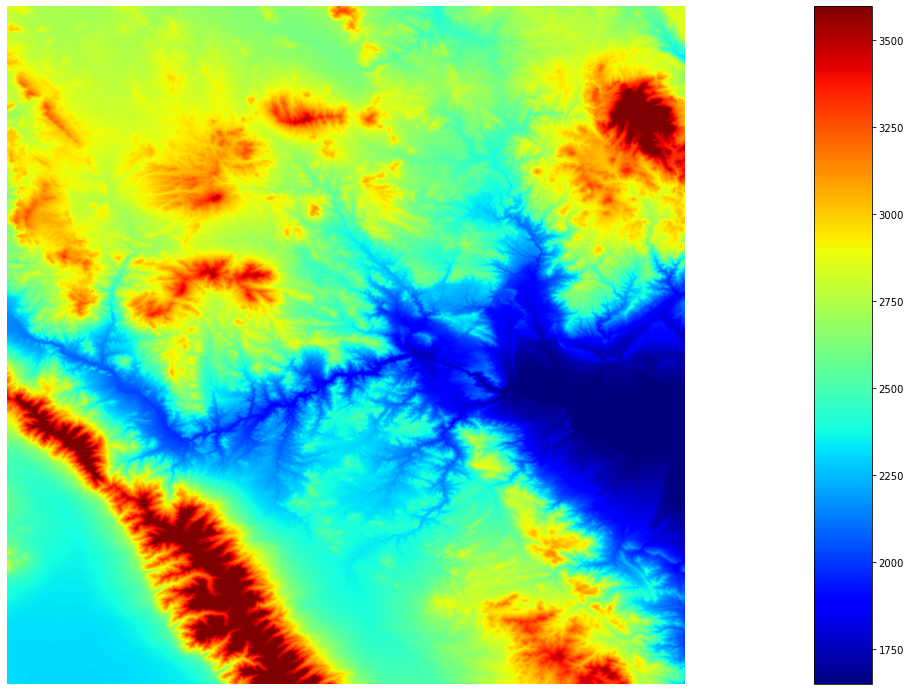

In [10]:
dem_filled = rd.FillDepressions(dem_richdem, in_place=False)
dem_filled_fig = rd.rdShow(dem_filled, ignore_colours=[0], axes=False, cmap='jet', vmin=fig['vmin'], vmax=fig['vmax'], figsize=(16,10))